#### Problem

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid.

And this is where we come in. Our job is to categorise the countries using socio-economic and health factors that determine the overall development of the country. Then we need to suggest the countries which the CEO needs to focus on the most.

### Step 1 : Importing the data

In [1]:
# Importing all the necessary libraries

# removing Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
countries=pd.read_csv('Country-data.csv')

### Step 2 : Inspecting the data 

In [3]:
# inspecting top 5 rows of the dataframe
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# checking the shape of the data frame
countries.shape

(167, 10)

In [5]:
# checking the missing values and the data type of the columns
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# checking for the values of numerical columns
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 3 : Preparing the data  

In [7]:
# we are changing the exports column to the absolute value so that we can compare it with other countries
countries['exports']=(countries['exports']*countries['gdpp'])/100

In [8]:
# we are changing the health column to the absolute value so that we can compare it with other countries
countries['health']=(countries['health']*countries['gdpp'])/100

In [9]:
# we are changing the imports column to the absolute value so that we can compare it with other countries
countries['imports']=(countries['imports']*countries['gdpp'])/100

### Step 4 : EDA

In [10]:
# Bivariate analysis
def bi_cat_analysis(df0,z):
    plt.figure(figsize=(15, 6), dpi=80)
    plt.subplot(1,2,1)
    plt.title('Top 5 countries in '+ z)
    data1=countries.sort_values(z,ascending=False)[['country',z]].head()
    data1.columns=['country',z]
    graph = sns.barplot(x='country', data=data1,y=z,palette='viridis',hatch='/')
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height ,
            round(list(data1[z])[i],2),ha="center")
        i += 1
        
    plt.subplot(1,2,2)
    plt.title('Bottom 5 countries in '+ z)
    data1=countries.sort_values(z,ascending=False)[['country',z]].tail()
    data1.columns=['country',z]
    graph = sns.barplot(x='country', data=data1,y=z,palette='viridis',hatch='/')
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
    i=0
    for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height ,
            round(list(data1[z])[i],2),ha="center")
        i += 1
    

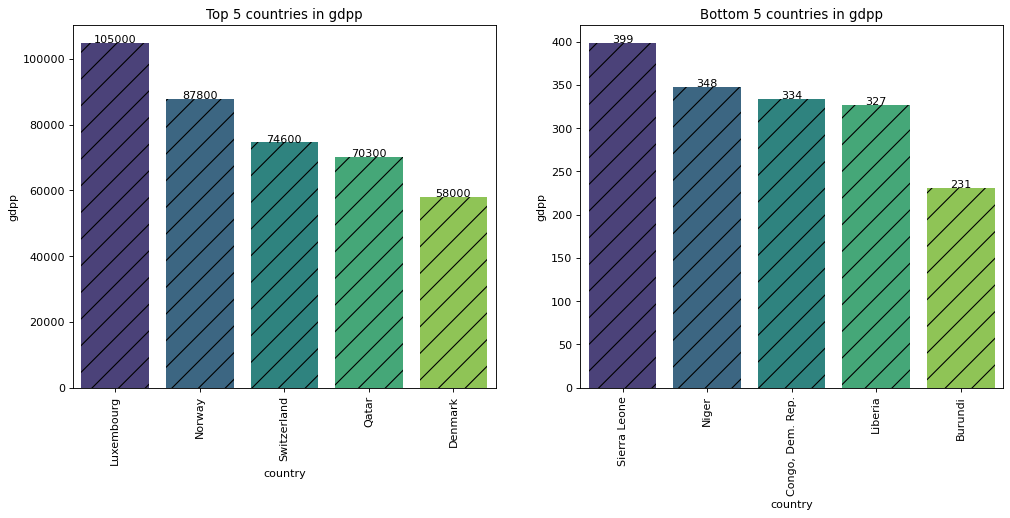

In [11]:
# analyis of gdpp column
bi_cat_analysis(countries,'gdpp')

#### Inference :
- Burundi has the lowest GDP so we will keep this in mind while selecting the cluster for which help must be provided.
- Luxembourg has the highest GDP so these category country does not need help.

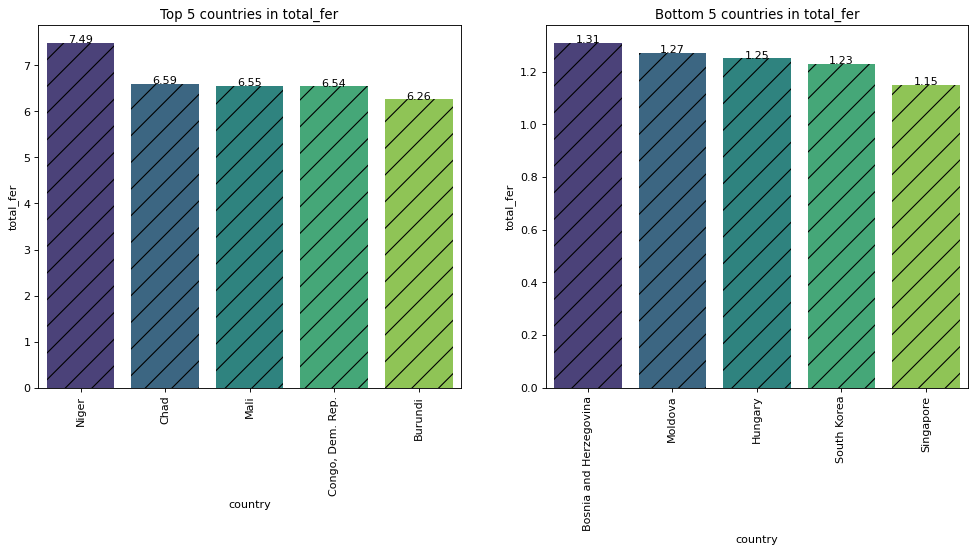

In [12]:
# analyis of gdpp column
bi_cat_analysis(countries,'total_fer')

#### Inference 
- Niger has the highest total-fertility rate, having higher fertility rate is not good.
- Singapore has the lowest fertility rate.

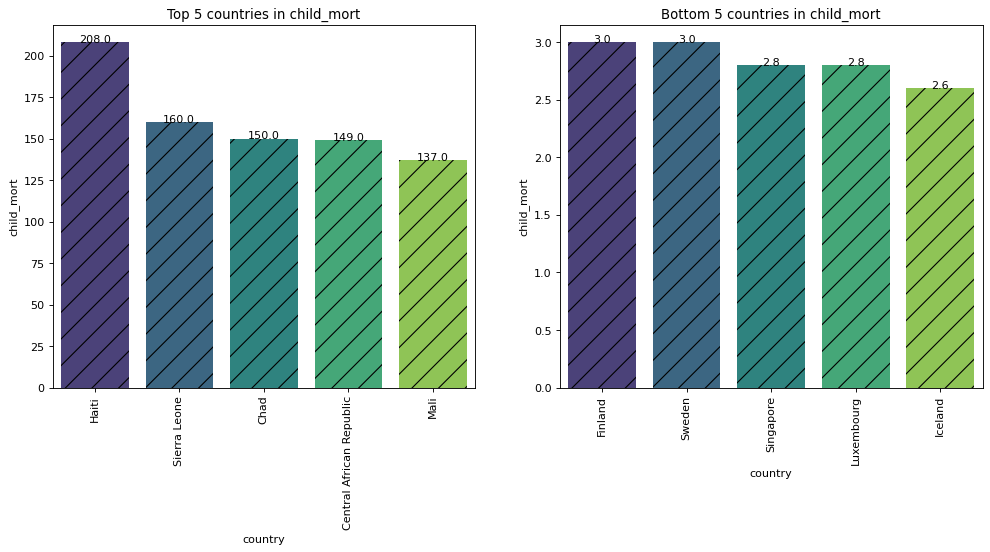

In [13]:
# analyis of gdpp column
bi_cat_analysis(countries,'child_mort')

#### Inference
- Haiti has the highest child mortality rate.
- Iceland has least mortality rate.

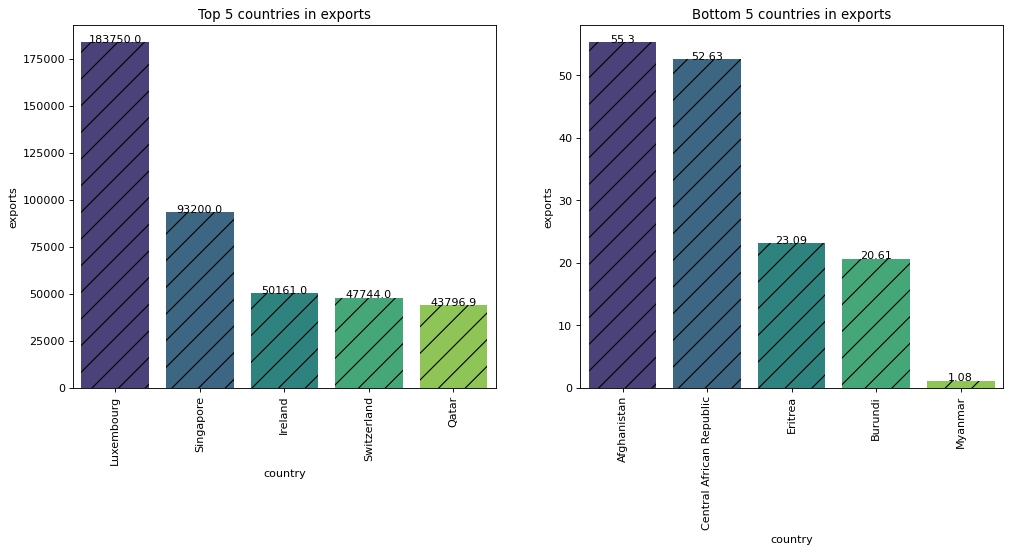

In [14]:
# analyis of gdpp column
bi_cat_analysis(countries,'exports')

#### Inference :
- Myanmar has the lowest Exports.
- Luxembourg has the highest Exports.

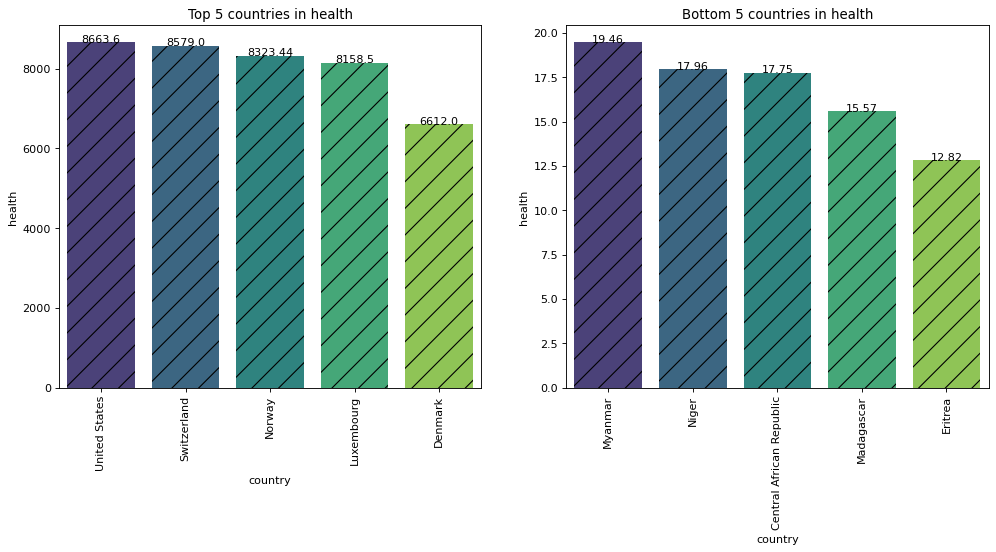

In [15]:
# analyis of gdpp column
bi_cat_analysis(countries,'health')

#### Inference :
- Eritrea has the lowwest spending in healthcare.
- United States has the highest spending in healthcare.

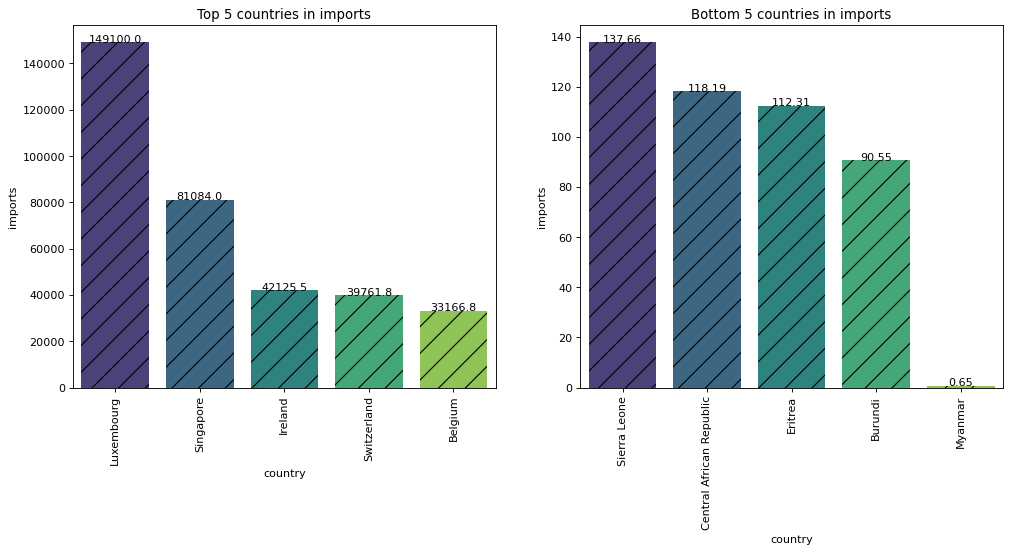

In [16]:
# analyis of gdpp column
bi_cat_analysis(countries,'imports')

#### Inference :
- Myanmar has the lowest imports.
- Luxembourg has the highest imports.

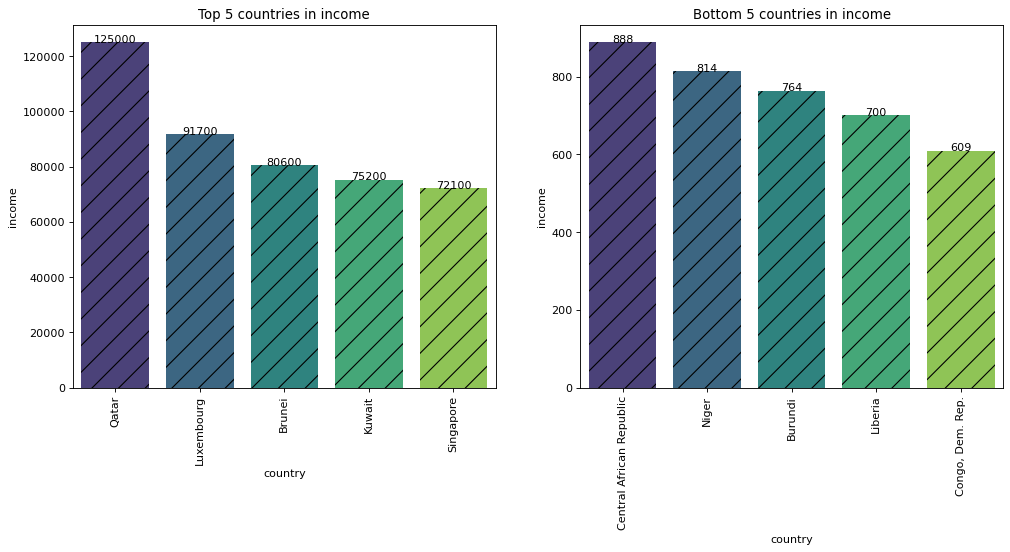

In [17]:
# analyis of gdpp column
bi_cat_analysis(countries,'income')

#### Inference :
- congo, Dem. Rep has the lowest income rate per person.
- Qatar has the highest income rate per person.

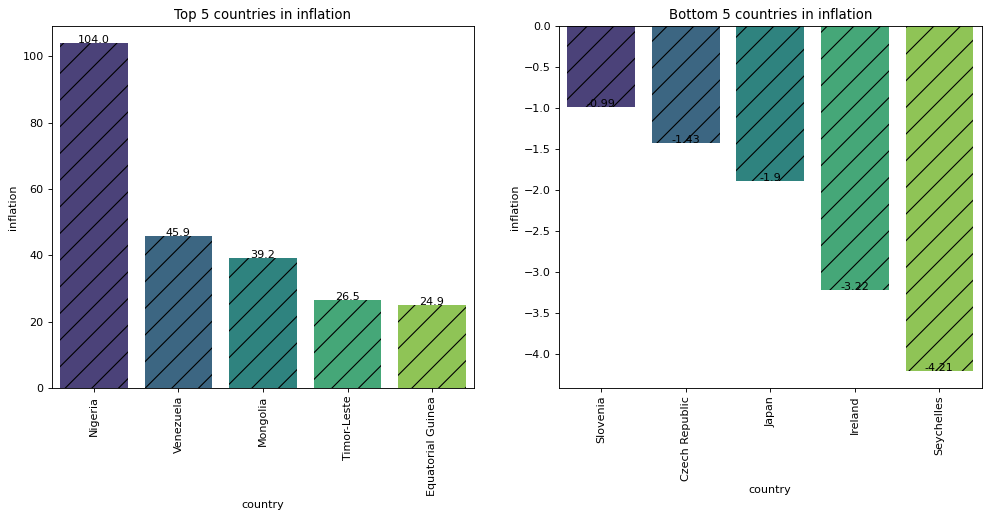

In [18]:
# analyis of gdpp column
bi_cat_analysis(countries,'inflation')

#### Inference
- Nigeria has the highest inflation rate.
- Seychelles has the lowest inflation rate.

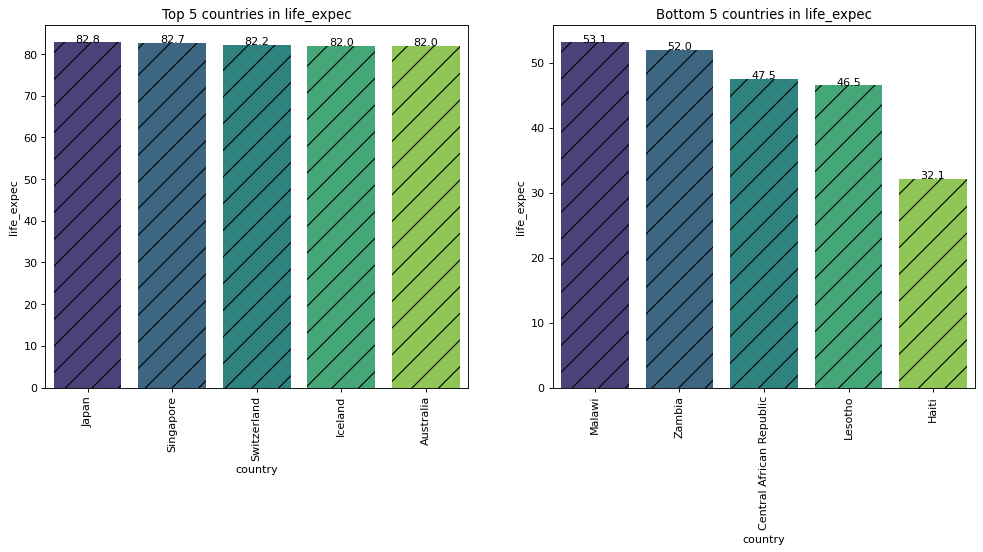

In [19]:
# analyis of gdpp column
bi_cat_analysis(countries,'life_expec')

#### Inference :
- Haiti has the lowest life-expectancy.
- japan has the highest life expectency.

In [20]:
countries1 = countries[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

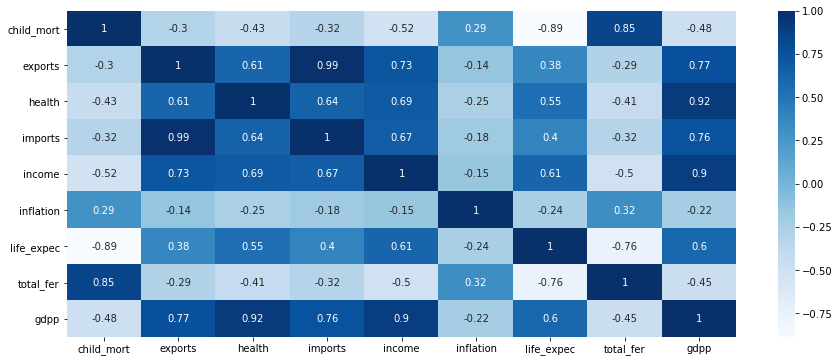

In [21]:
plt.figure(figsize=(15, 6))
sns.heatmap(countries1.corr(),annot=True,cmap='Blues')
plt.show()

#### Inference :
- There is very high correlation between import and exports.
- There is a high correlation between gdpp and income as well as gdpp and health.
- There is high correlation between child mortality and total fertility.

### Step 5 : Preparing data for Modelling 

#### Outlier handling 

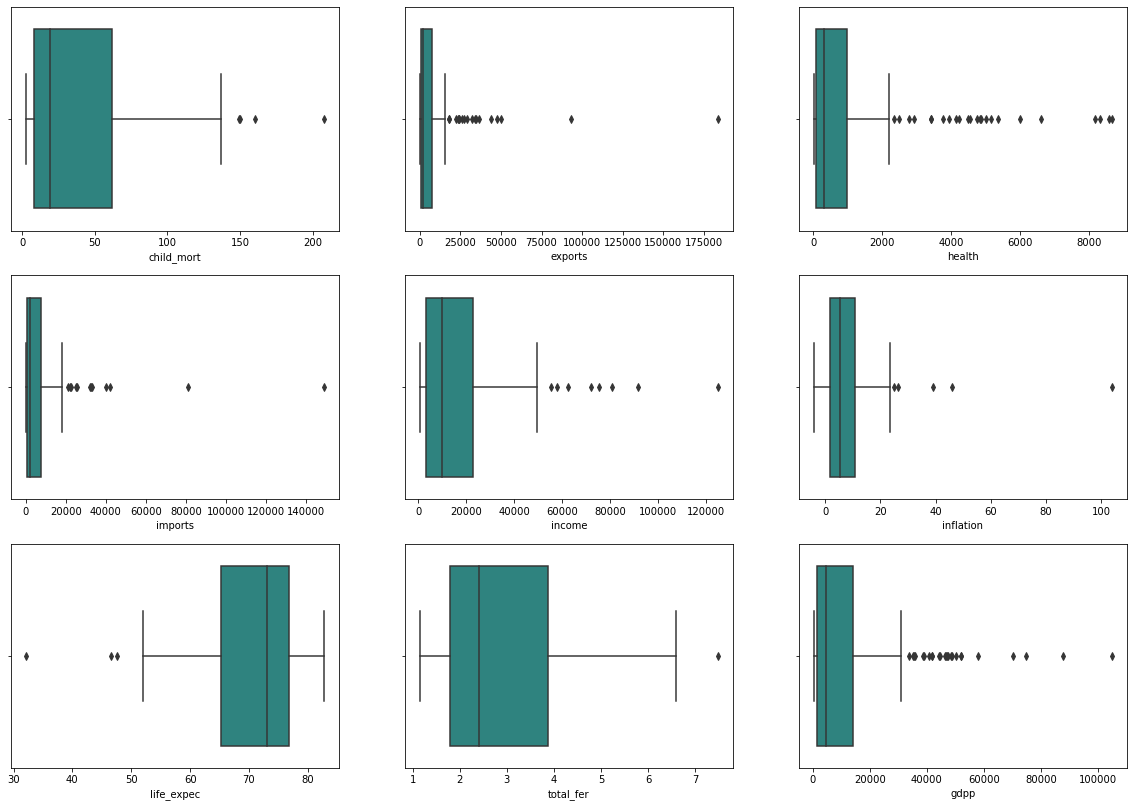

In [22]:
plt.figure(figsize = (20,14))
feature = countries.columns[1:]
for i in enumerate(feature):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(countries[i[1]],palette='viridis')

#### we have to remove the outliers as they affect our analysis a lot
#### we will cap the outliers for the countries with best scenario as we are not concerned about them and we will keep the countries with worst scenario even if its an outlier because we want to include them in our analysis.


In [23]:
#Capping
upper_cap_cols=[ 'gdpp', 'imports', 'exports', 'income', 'health']


for col in upper_cap_cols:
    q = countries[col].quantile(0.95)
    countries[col][countries[col]>= q] = q
    


#### Scaling the numerical columns

In [24]:
# instantiate
scaler = StandardScaler()

# fit_transform
countries1 = scaler.fit_transform(countries1)
countries1

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
# converting scaled array back to data frame
countries1 = pd.DataFrame(countries1)
countries1.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
countries1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


#### Hopkins test

The Hopkins statistic, is a statistic which gives a value which indicates the cluster tendency, in other words: how well the data can be clustered.

- If the value is between {0.01, ...,0.3}, the data is regularly spaced.

- If the value is around 0.5, it is random.

- If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster.

In [26]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
hopkins(countries1)

0.9057108295124842

### Step 6 : Making the model 

#### K-mean model

In [28]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50,random_state=100)
kmeans.fit(countries1)

KMeans(max_iter=50, n_clusters=4, random_state=100)

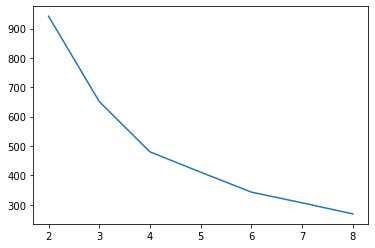

In [29]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries1)
    
    ssd.append(kmeans.inertia_)
plt.xticks([0,1,2,3,4,5,6,7],[2, 3, 4, 5, 6, 7, 8])    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [30]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(countries1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.4340796716611797
For n_clusters=6, the silhouette score is 0.39279369617575527
For n_clusters=7, the silhouette score is 0.289458502523007
For n_clusters=8, the silhouette score is 0.29567925733287775


#### By seeing the results and keeping business perspective in mind we can conclude that k=3 is significant.

In [31]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50,random_state=100)
kmeans.fit(countries1)

KMeans(max_iter=50, n_clusters=3, random_state=100)

In [32]:
# assign the label
countries['cluster_id'] = kmeans.labels_
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2


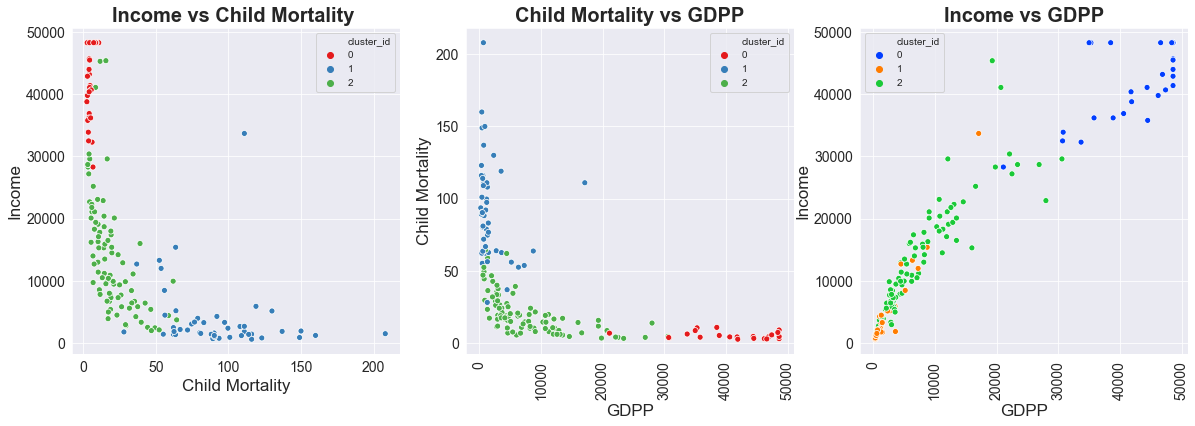

In [33]:
# plotting all the points to find our the cluster we were looking for 
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_id',data=countries, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='cluster_id',data=countries, palette='Set1')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id',data=countries, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

#### From the above graph we can see that cluster 1 is the one we were looking for as it has the worst conditions in all the given graphs.

In [34]:
# we will make a new data frame for cluster 1
country_help=countries[countries['cluster_id']==1]
country_help_1=country_help.drop(['country','cluster_id'],1)

In [35]:
country_help.shape

(48, 11)

In [36]:
# lets see if the new data is clusterable
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(country_help_1)

0.9824152785349336

####  As the above data has hopkin score >80% we can say that it has significant clusters.

In [38]:
# fitting a clustering model again on the new data frame to get required number of countries
# choosen the k of clusters based on trial and error so that we get a cluster with 10 countries with worst conditions
kmeans = KMeans(n_clusters=13, max_iter=50,random_state=15)
kmeans.fit(country_help_1)

KMeans(max_iter=50, n_clusters=13, random_state=15)

In [39]:
# making new cluster id 
country_help['final_cluster_id'] = kmeans.labels_
country_help.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,final_cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553,1,1
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,1,5
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758,1,1
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,1,3
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575,1,1


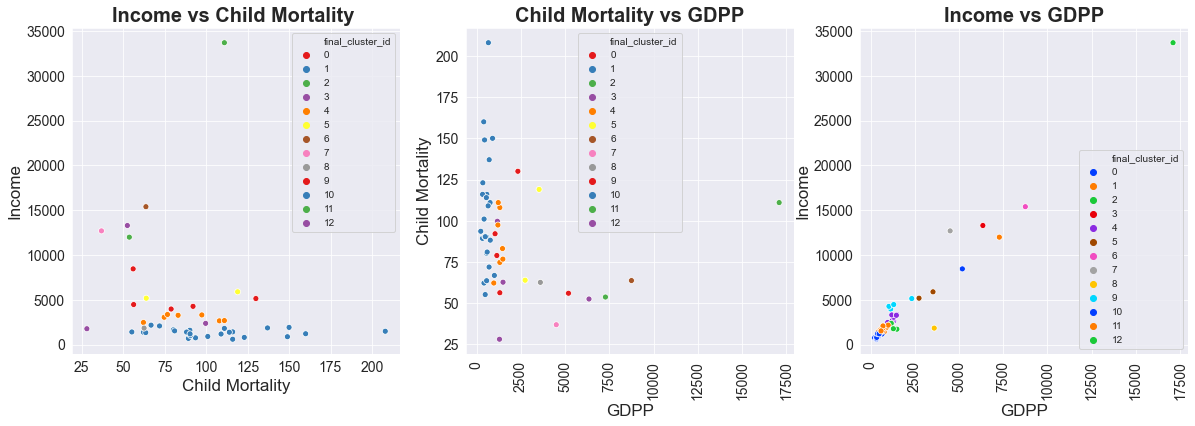

In [40]:
# Visualizing the clusters
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='final_cluster_id',data=country_help, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='final_cluster_id',data=country_help, palette='Set1')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='final_cluster_id',data=country_help, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

#### we can see here that cluster 10 has the worst conditions in all the graphs so we will select cluster 10

In [41]:
# we were looking for cluster number 10 as it has worst conditions
country_help[country_help['final_cluster_id']==10].shape

(10, 12)

In [42]:
# so these are the selected countries through k-mean clustring who are in dire need of help.
country_help[country_help['final_cluster_id']==10]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,final_cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,1,10
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,1,10
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,1,10
63,Guinea,109.0,196.3440,31.9464,279.936,1190.0,16.10,58.0,5.34,648,1,10
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,1,10
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,1,10
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,1,10
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,1,10
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,1,10
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488,1,10


In [43]:
# storing these countries
k_mean_countries = country_help[country_help['final_cluster_id']==10]['country']

#### Hierarchical Clustering

In [44]:
# checking the data frame
countries1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


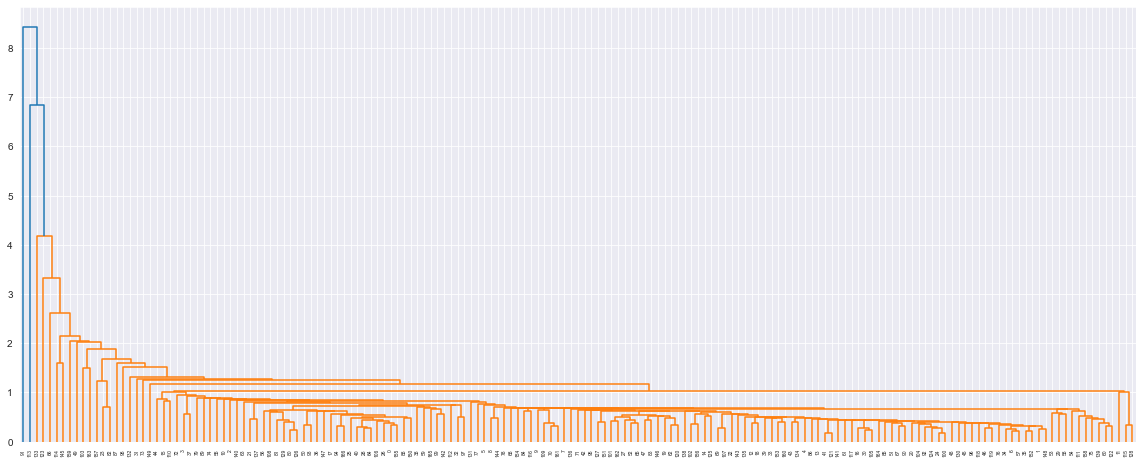

In [45]:
# single linkage
plt.figure(figsize = (20,8))
mergings = linkage(countries1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### This is not that clear let's try with complete linkage

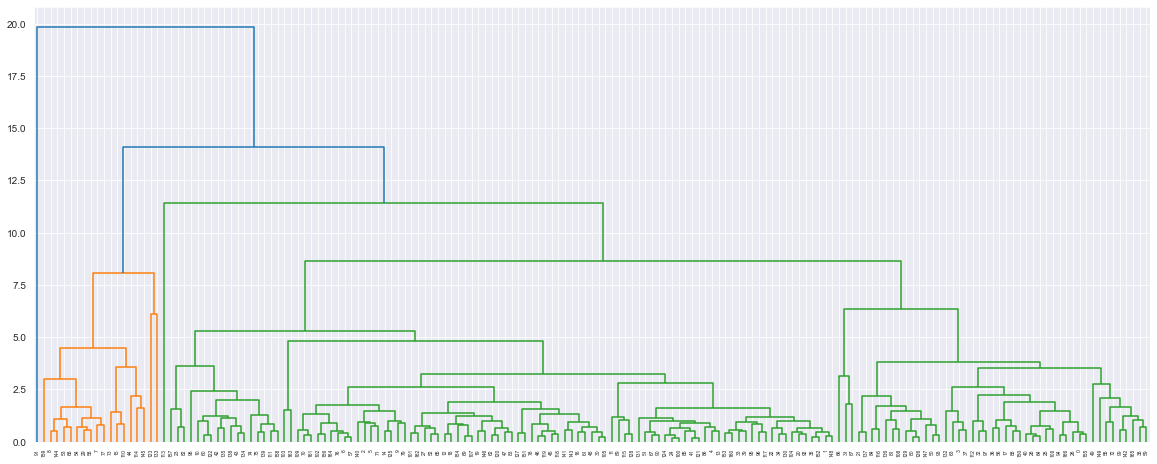

In [46]:
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(countries1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [47]:
# choosing hight for cutting tree as 7 as we can see relevant clusters at that cutoff.
cluster_labels = cut_tree(mergings,n_clusters=6).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 5, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 5, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0])

In [48]:
# assign cluster labels
countries['Hierarchical_cluster_id'] = cluster_labels
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,1,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,2,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,1,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,2,1


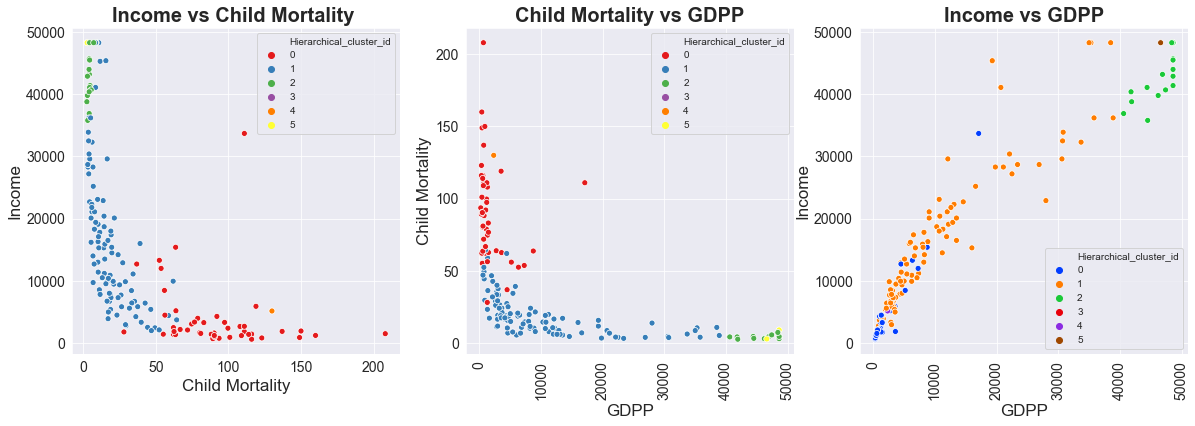

In [49]:
# visualizing the clusters
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='Hierarchical_cluster_id',data=countries, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='Hierarchical_cluster_id',data=countries, palette='Set1')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='Hierarchical_cluster_id',data=countries, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

In [50]:
# according to the above graph cluster 0 is the cluster we were looking for.
countries[countries['Hierarchical_cluster_id']==0].shape

(47, 12)

In [51]:
# we are making a data frame with only cluster 0.
Intrested_countries=countries[countries['Hierarchical_cluster_id']==0]

In [52]:
# dropping columns which are not needed for model building.
Intrested_countries_1=Intrested_countries.drop(['country','Hierarchical_cluster_id'],1)

In [53]:
# applying hopkins test on the new data set
hopkins(Intrested_countries_1)

0.928079780835198

#### the data is clusterable.

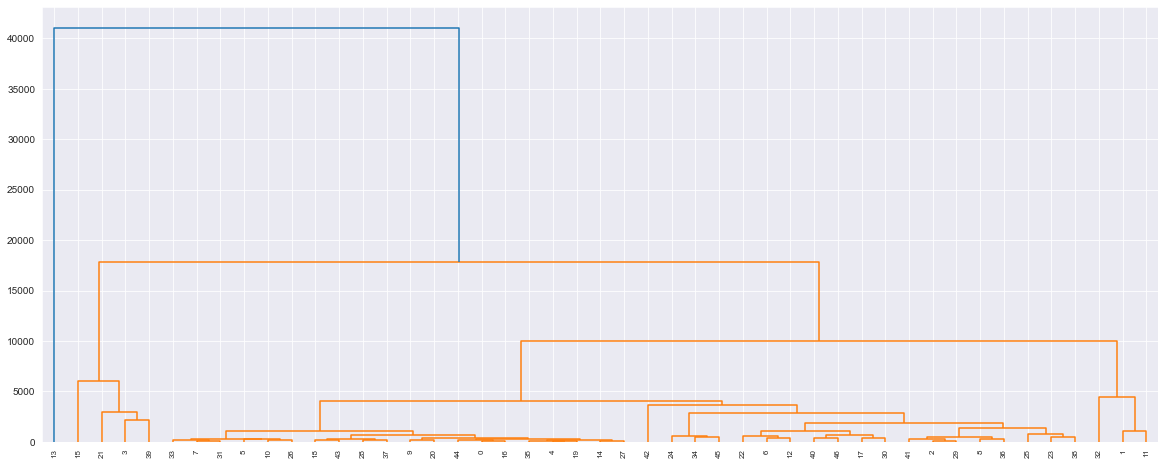

In [54]:
# making another clustering model only on 
# complete linkage
plt.figure(figsize = (20,8))
mergings = linkage(Intrested_countries_1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [55]:
# no of clusters has been chosen by trial and error for getting lesser no of data points with worst condition
cluster_labels = cut_tree(mergings,n_clusters=14).reshape(-1, )
cluster_labels

array([ 0,  1,  2,  3,  0,  4,  5,  4,  2,  0,  4,  1,  5,  6,  0,  7,  0,
        5,  0,  0,  0,  8,  5,  9, 10,  9,  4,  0,  0,  2,  5,  4, 11,  4,
       10,  0,  2,  0,  9, 12,  5,  2, 13,  0,  0, 10,  5])

In [56]:
# assign cluster labels
Intrested_countries['final_Hierarchical_id'] = cluster_labels
Intrested_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,Hierarchical_cluster_id,final_Hierarchical_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553,1,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,1,0,1
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758,1,0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,1,0,3
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575,1,0,0


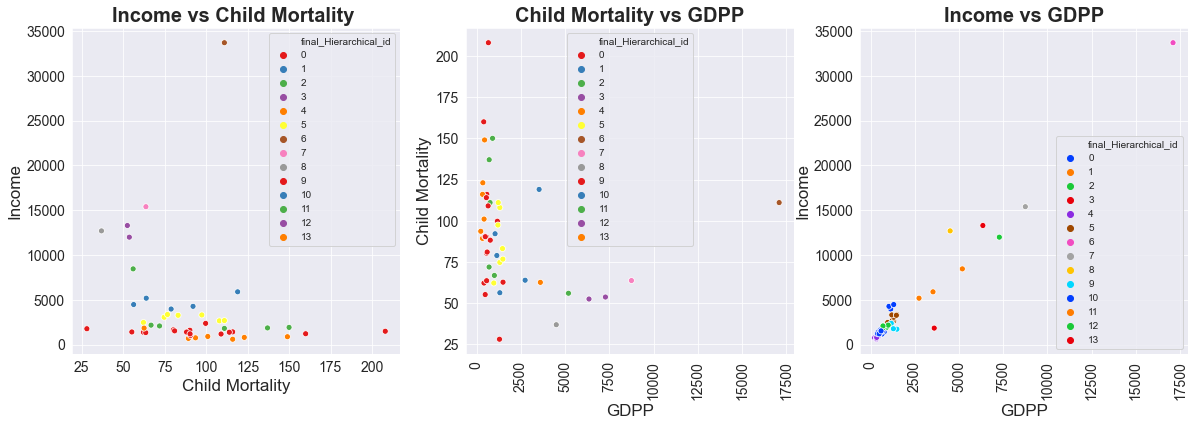

In [57]:
# visualizing the clusters.
sns.set_style("darkgrid")

fig, axes = plt.subplots(1,3, figsize=(20,6))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='final_Hierarchical_id',data=Intrested_countries, palette='Set1')
plt.title('Income vs Child Mortality ',fontweight="bold", size=20)
plt.xlabel('Child Mortality', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14)

plt.subplot(1,3,2)
sns.scatterplot(y='child_mort', x='gdpp', hue='final_Hierarchical_id',data=Intrested_countries, palette='Set1')
plt.title('Child Mortality vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Child Mortality', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='final_Hierarchical_id',data=Intrested_countries, palette='bright')
plt.title('Income vs GDPP',fontweight="bold", size=20)
plt.xlabel('GDPP', size=17)
plt.ylabel('Income', size=17)
plt.yticks(size=14)
plt.xticks(size=14,rotation=90)

#plt.tight_layout()
plt.show()

In [58]:
# cluster with worst conditions is cluster 4
Intrested_countries[Intrested_countries['final_Hierarchical_id']==4].shape

(6, 13)

In [59]:
# making data frame of these countries
Hierarchical_countries=Intrested_countries[Intrested_countries['final_Hierarchical_id']==4]['country']

In [60]:
Hierarchical_countries

26                      Burundi
31     Central African Republic
37             Congo, Dem. Rep.
88                      Liberia
106                  Mozambique
112                       Niger
Name: country, dtype: object

In [61]:
# considering the countries which are common in both the model analysis 
aid_countries_final = pd.merge(Hierarchical_countries, k_mean_countries, how ='inner') 

In [62]:
# making data frame of the final list 
aid_countries_final

,country
0,Burundi
1,Central African Republic
2,"Congo, Dem. Rep."
3,Liberia
4,Mozambique
5,Niger


In [63]:
# Countries that need help are:
aid_countries_final.reset_index(inplace=True)
aid_countries_final.index = aid_countries_final.index+1
aid_countries_final[['country']]


,country
1,Burundi
2,Central African Republic
3,"Congo, Dem. Rep."
4,Liberia
5,Mozambique
6,Niger


#### Countries which are in direst need of aid are : 

- Burundi
- Central African Republic
- Congo, Dem. Rep.
- Liberia
- Mozambique
- Niger

#### Final Recommendation to CEO:
As listed above, these countries have very low incomes and very high child mortalities, they are in urgent need of aid and should be considered as first priority to be helped.